## Librairies

In [14]:
import pandas as pd
import polars as pl
import re
import html as html_parser
import matplotlib.pyplot as plt
from lxml import html
from tqdm import tqdm, notebook
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\33649\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33649\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing Data

In [2]:
df_law = pd.read_csv('laws.csv')
# df_law.fetch(2)

In [10]:
df_law.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92177 entries, 0 to 92176
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Abstract       92177 non-null  object
 1   Checksum       92177 non-null  object
 2   Datum          92177 non-null  object
 3   HTML.Checksum  92177 non-null  object
 4   HTML.Datei     92177 non-null  object
 5   HTML.URL       92177 non-null  object
 6   Kopfzeile      92177 non-null  object
 7   Meta           92177 non-null  object
 8   Num            92177 non-null  object
 9   Raw            92177 non-null  object
 10  RawType        92177 non-null  object
 11  ScrapyJob      92177 non-null  object
 12  Signatur       92177 non-null  object
 13  Site           92177 non-null  object
 14  Spider         92177 non-null  object
 15  Sprache        92177 non-null  object
 16  Type           92177 non-null  object
 17  Uri            92177 non-null  object
 18  Zeit UTC       92177 non-n

In [1]:
def get_text(html_string: str) -> str:
    """ Extract the text from an HTML string. """""
 
    parsed_html = html.fromstring(html_string)
    p_tags = parsed_html.xpath('//p') # Find all the <p> tags
    text = ' '.join([p_tag.text_content() for p_tag in p_tags])

    text = html_parser.unescape(text) # Unescape HTML entities
    text = re.sub('\s+', ' ', text) # Remove extra whitespace

    return text


In [4]:
df_law['Text'] = df_law['Raw'].apply(lambda x: get_text(x))

In [5]:
documents = df_law['Text'][df_law['Sprache']=='fr'].tolist()

In [9]:
documents[0]

" republique et canton de geneve POUVOIR JUDICIAIRE Cour d’appel du Pouvoir judiciaire Arrêt du 19 juin 2020 CAPJ 1_2020 ACAPJ/2/2020 Madame A______, recourante contre LE CONSEIL SUPERIEUR DE LA MAGISTRATURE, intimé 1. Le 9 avril 2019, A______ a adressé au Conseil supérieur de la magistrature (ci-après : CSM) une dénonciation concernant le Juge B______, en sa qualité de Président du Tribunal de première instance, en charge notamment des mesures provisionnelles, dans le cadre de la procédure C/16238/2016 l’opposant au père de sa fille C______, née le 16 septembre 2011, au sujet de la garde, du droit de visite et des contributions d’entretien. Dans sa dénonciation, assortie de nombreux documents, A______ reprochait à ce magistrat d’importants « manquements » dans la gestion de la procédure précitée, notamment par des mesures super-provisionnelles et provisionnelles. 2. Par décision du 17 octobre 2019, la Présidente du CSM a classé cette dénonciation, considérant qu’il n’était pas une aut

In [11]:
class TextAnalyzer:
    def __init__(self, text):
        self.text = text
        self.sentences = sent_tokenize(text)
        self.words = word_tokenize(text)
        self.unique_words = set(self.words)
        # self.stopwords = set(stopwords.words('english'))
        self.punctuations = set(string.punctuation)
        self.hashtags = set(re.findall(r'#\w+', text))
        self.mentions = set(re.findall(r'@\w+', text))
    
    def num_characters(self):
        return len(self.text)
    
    def num_words(self):
        return len(self.words)
    
    def num_capital_characters(self):
        return sum(1 for c in self.text if c.isupper())
    
    def num_capital_words(self):
        return sum(1 for w in self.words if w.isupper())
    
    def num_punctuations(self):
        return sum(1 for c in self.text if c in self.punctuations)
    
    def num_words_in_quotes(self):
        return sum(1 for w in self.words if w[0] in ['\'', '"'])
    
    def num_sentences(self):
        return len(self.sentences)
    
    def num_unique_words(self):
        return len(self.unique_words)
    
    def num_hashtags(self):
        return len(self.hashtags)
    
    def num_mentions(self):
        return len(self.mentions)
    
    def unique_words_vs_word_count(self):
        return len(self.unique_words) / len(self.words)
    
    def stopwords_count_vs_word_count(self):
        return self.num_stopwords() / len(self.words)

In [12]:
nb_words = dict()
nb_kapital_caracters = dict()
n_unique_words = dict()
n_sentences = dict()
# documents = [clean_data(data[key][0].text) for key in data.keys()]
n_word = 0
n_k_caracter = 0
n_sentence = 0
n_unique_word = 0
for document in notebook.tqdm(documents):
    n_word += TextAnalyzer(document).num_words()
    n_sentence += TextAnalyzer(document).num_sentences()
    n_unique_word += TextAnalyzer(document).num_unique_words()
    n_k_caracter += TextAnalyzer(document).num_characters()

  0%|          | 0/91447 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [13]:
df_law['Text'].str.len().describe()

count     92177.000000
mean      22929.625612
std       21280.127998
min           0.000000
25%        8999.000000
50%       17567.000000
75%       30762.000000
max      601566.000000
Name: Text, dtype: float64

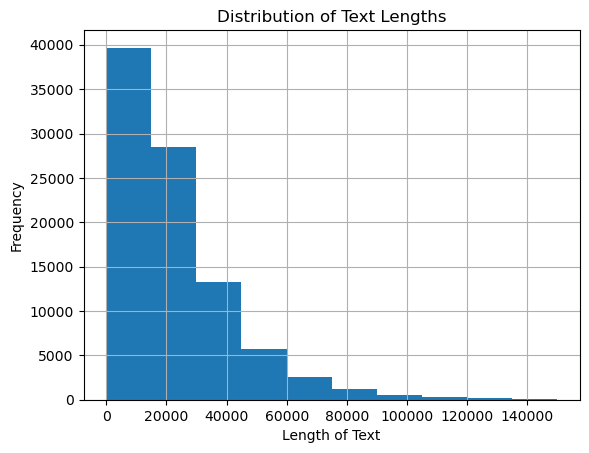

In [15]:
len_char = df_law['Text'].str.len().copy()
len_char[len_char<150000].hist()

plt.title("Distribution of Text Lengths")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.show()

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(corpus):
    """
    Plots a word cloud of the given corpus.
    """
    # Combine all the documents into a single string
    text = ' '.join(corpus)
    
    # Create a word cloud object
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


In [17]:
plot_wordcloud(documents)

MemoryError: 